<a href="https://colab.research.google.com/github/Mustafa-Hassan2001/1-Week-Preparation-Kit---Day-04-/blob/main/Cats_and_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.Kaggle         #importing dataset to
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats #Api command of dataset from kaggle

In [9]:
import zipfile         #for unzip the dataset file
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
import tensorflow as tf     #importing important libaries
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [11]:
#generators = it send data to the model in bitches
#generators is useful to process large amount of data

#generator1 for train data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)
#generator2 for vaidation data
valiidation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize: it is perform to set all images in the range of 0-1 pixels
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
valiidation_ds = valiidation_ds.map(process)

In [20]:
#create CNN model

model = Sequential()

#1st Layer 32 filters
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#2nd Layer 64 filters
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#3rd Layer 128 filters
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [24]:
#compilation of model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
#execution of cnn model
history = model.fit(train_ds,epochs=10,validation_data=valiidation_ds)

Epoch 1/10
625/625 [==============================] - 70s 106ms/step - loss: 1.4359 - accuracy: 0.5591 - val_loss: 0.7439 - val_accuracy: 0.5492
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6349 - accuracy: 0.6181 - val_loss: 0.6185 - val_accuracy: 0.6872
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5935 - accuracy: 0.6680 - val_loss: 0.6160 - val_accuracy: 0.6436
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5301 - accuracy: 0.7260 - val_loss: 0.5396 - val_accuracy: 0.7382
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4560 - accuracy: 0.7674 - val_loss: 0.4614 - val_accuracy: 0.7964
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4029 - accuracy: 0.7988 - val_loss: 0.4417 - val_accuracy: 0.7966
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3455 - accuracy: 0.8296 - val_loss: 0.5215 - val_ac

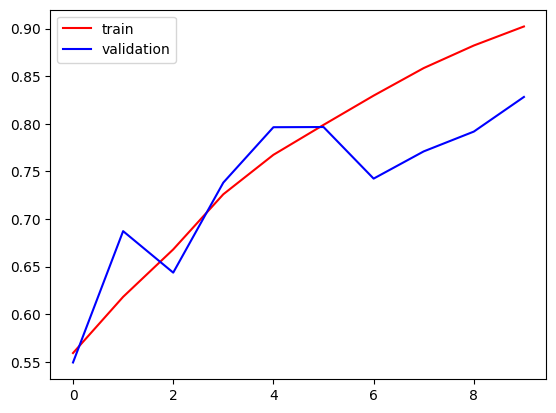

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

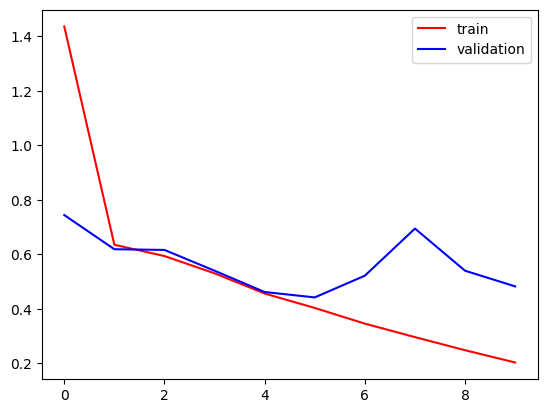

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

To reduce this overfitting we can use these ways:
1) ADD MORE DATA
2) DATA AUGMENTATION
3) L1/L2 REGULARIZER
4) DROPOUT
5) BATCH NORM
6) REDUCE COMPLEXITY

In [126]:
import cv2

TESTING THE MODEL FOR DOG

In [139]:
test_img = cv2.imread('/content/cat.jpg')

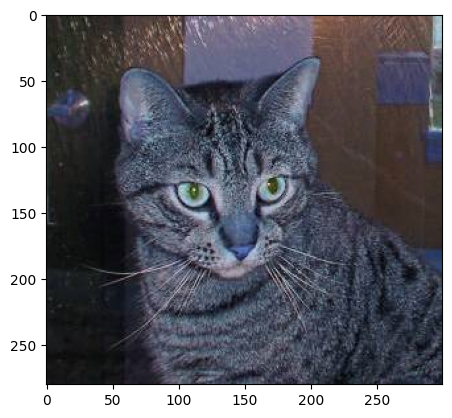

In [140]:
plt.imshow(test_img)

In [141]:
test_img.shape

(280, 300, 3)

In [142]:
test_img = cv2.resize(test_img,(256,256))

In [143]:
test_input = test_img.reshape((1,256,256,3))

In [144]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)